<a href="https://colab.research.google.com/github/Meena-2826/ATM-Interface-in-Java/blob/main/gsoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# --- SIMULATED DATASET ---
np.random.seed(42)
data = {
    'timestamp': pd.date_range(start='2024-01-01', periods=100, freq='D'),
    'location': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], 100),
    'text': np.random.choice([
        "I'm feeling so overwhelmed",
        "Need help... can't take this anymore",
        "Life is beautiful today!",
        "Thinking about using again...",
        "Anxiety is killing me lately",
        "Got through today somehow",
        "Clean for 6 months now!"
    ], 100)
}
df = pd.DataFrame(data)
df.head()


,timestamp,location,text
0,2024-01-01,Houston,Thinking about using again...
1,2024-01-02,Phoenix,Clean for 6 months now!
2,2024-01-03,Chicago,I'm feeling so overwhelmed
3,2024-01-04,Phoenix,Thinking about using again...
4,2024-01-05,Phoenix,Need help... can't take this anymore


In [5]:
# --- SENTIMENT ANALYSIS ---
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'negative' if x < -0.2 else ('positive' if x > 0.2 else 'neutral'))

df[['text', 'sentiment_score', 'sentiment_label']].head()



,text,sentiment_score,sentiment_label
0,Thinking about using again...,0.0000,neutral
1,Clean for 6 months now!,0.4574,positive
2,I'm feeling so overwhelmed,0.2769,positive
3,Thinking about using again...,0.0000,neutral
4,Need help... can't take this anymore,0.0000,neutral


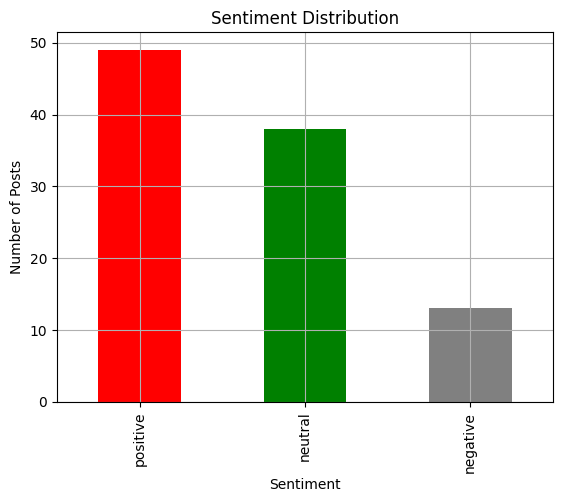

In [6]:
# --- SENTIMENT DISTRIBUTION VISUALIZATION ---
df['sentiment_label'].value_counts().plot(kind='bar', title='Sentiment Distribution', color=['red', 'green', 'gray'])
plt.ylabel("Number of Posts")
plt.xlabel("Sentiment")
plt.grid(True)
plt.show()



In [8]:
import nltk
nltk.download('punkt')         # Sentence/word tokenizer
nltk.download('stopwords')     # Common English stopwords
nltk.download('wordnet')       # Optional: for lemmatization




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
import nltk

# Force download
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For lemmatization if needed



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [15]:
!rm -rf /root/nltk_data


In [16]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')  # Optional: if you're using stopwords


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
!pip install -q spacy
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 88.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [19]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "This is a test sentence for tokenization."
doc = nlp(text)
tokens = [token.text for token in doc]
print(tokens)


['This', 'is', 'a', 'test', 'sentence', 'for', 'tokenization', '.']


In [21]:
!pip install -q spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 66.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [22]:
import spacy

nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words

# Example data
texts = ["This is a test sentence about mental health and crisis."]

# Tokenize & clean
cleaned_texts = []
for doc in texts:
    tokens = [token.text.lower() for token in nlp(doc) if token.is_alpha and token.text.lower() not in stop_words]
    cleaned_texts.append(tokens)

print(cleaned_texts)


[['test', 'sentence', 'mental', 'health', 'crisis']]


In [23]:
# --- GEOSPATIAL MAPPING (Heatmap) ---
city_coords = {
    'New York': [40.7128, -74.0060],
    'Los Angeles': [34.0522, -118.2437],
    'Chicago': [41.8781, -87.6298],
    'Houston': [29.7604, -95.3698],
    'Phoenix': [33.4484, -112.0740]
}

m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

for city in df['location'].unique():
    lat, lon = city_coords[city]
    count = df[df['location'] == city].shape[0]
    folium.CircleMarker(location=[lat, lon],
                        radius=count / 5,
                        popup=f"{city}: {count} posts",
                        color='red',
                        fill=True).add_to(m)

m.save("crisis_heatmap.html")
m  # This displays in Jupyter, won't show in Colab, but file is saved


In [24]:
# --- TEMPORAL TREND ANALYSIS ---
df['day'] = df['timestamp'].dt.date
daily_sentiment = df.groupby('day')['sentiment_score'].mean().reset_index()

fig = px.line(daily_sentiment, x='day', y='sentiment_score',
              title='Average Sentiment Over Time',
              labels={'sentiment_score': 'Avg Sentiment Score'})
fig.show()
